In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from mlxtend.frequent_patterns import association_rules, apriori

Run the code below, and upload Bakery.csv from your laptop

In [ ]:
#import csv
#from pathlib import Path
# import io

#sheet_id = "1DfvAYALdjdqiw6mbZ-xu19wo-YxNjP8RmmbOzz60OZo"
#df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")

# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('Bakery.csv')

In [ ]:
# df = pd.read_csv(io.BytesIO(uploaded['Bakery.csv']), encoding='latin1')
# df_original = df.copy()
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [ ]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

# Changing products to Krispy Kreme's

In [ ]:
df['Items'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

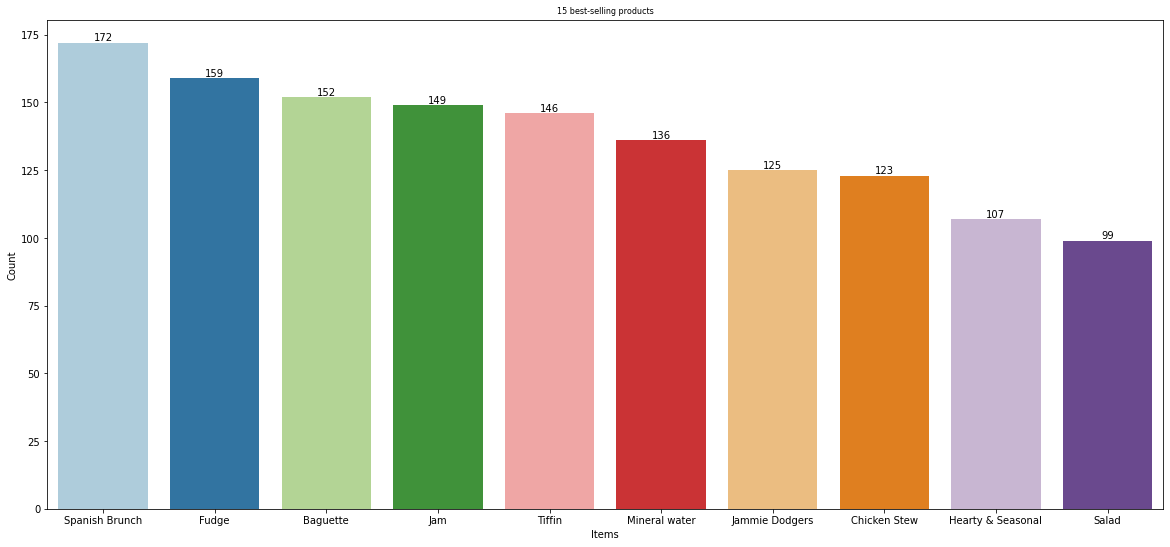

In [ ]:
products=df["Items"].value_counts().head(30).reset_index(name="Count")
products=products[20:]
products=products.rename(columns={"index":"Items"})
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("15 best-selling products",size=8)


In [ ]:
replacements = {
    "Coffee": "Original Glazed",
    "Bread": "Original Glazed",
    
    "Tea": "Glazed Chocolate Cake",
    "Pastry": "Glazed Chocolate Cake",
    "Sandwich": "Glazed Chocolate Cake",
    "Medialuna": "Glazed Chocolate Cake",
    "Hot Chocolate": "Glazed Chocolate Cake",
    "Juice": "Glazed Chocolate Cake",
    "Soup": "Glazed Chocolate Cake",
    "Scandinavian": "Glazed Chocolate Cake",
    "Spanish Brunch": "Glazed Chocolate Cake",
    "Fudge": "Glazed Chocolate Cake",
    "Mineral water": "Glazed Chocolate Cake",
    "Jammie Dodgers": "Glazed Chocolate Cake",
    "Chicken Stew": "Glazed Chocolate Cake",
    
    "Cake": "Chocolate Iced Glazed",
    "Cookies": "Chocolate Iced Glazed",
    "Brownie": "Chocolate Iced Glazed",
    "Farm House": "Chocolate Iced Glazed",
    "Muffin": "Chocolate Iced Glazed",
    "Alfajores": "Chocolate Iced Glazed",
    "Toast": "Chocolate Iced Glazed",
    "Truffles": "Chocolate Iced Glazed",
    "Coke": "Chocolate Iced Glazed",
    "Baguette Items": "Chocolate Iced Glazed",
    "Jam": "Chocolate Iced Glazed",
    "Tiffin": "Chocolate Iced Glazed",
    "Hearty & Seasonal": "Chocolate Iced Glazed",
    "Salad": "Chocolate Iced Glazed"
    
}

old_replacements = {
    "Coffee": "Original Glazed", 
    "Bread": "Original Glazed",

    "Tea": "Hazelnut Original Glazed",
    "Cake": "Hazelnut Original Glazed",
    "Alfajores": "Hazelnut Original Glazed",
    "Muffin": "Hazelnut Original Glazed", 

    "Pastry": "Chocolate Dream Cake",
    "Sandwich": "Chocolate Dream Cake",
    "Soup": "Chocolate Dream Cake",
    "Coke": "Chocolate Dream Cake",

    "Medialuna": "Soft Drinks",
    "Cookies": "Soft Drinks",
    "Scone": "Soft Drinks",

    "Hot Chocolate": "Strawberry Snow",
    "Juice": "Strawberry Snow",
    "Toast": "Strawberry Snow",
    "Truffles": "Strawberry Snow",

    "Brownie": "Coffee and Tea",
    "Farm House": "Coffee and Tea",
    "Scandinavian": "Coffee and Tea",
}

In [ ]:
df2 = df.copy()
df2['Items'] = df2['Items'].map(replacements).fillna('Drinks')

In [ ]:
df2

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Original Glazed,2016-10-30 09:58:11,Morning,Weekend
1,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend
2,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend
3,3,Drinks,2016-10-30 10:07:57,Morning,Weekend
4,3,Chocolate Iced Glazed,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Original Glazed,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Glazed Chocolate Cake,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Original Glazed,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Glazed Chocolate Cake,2017-09-04 14:57:06,Afternoon,Weekend


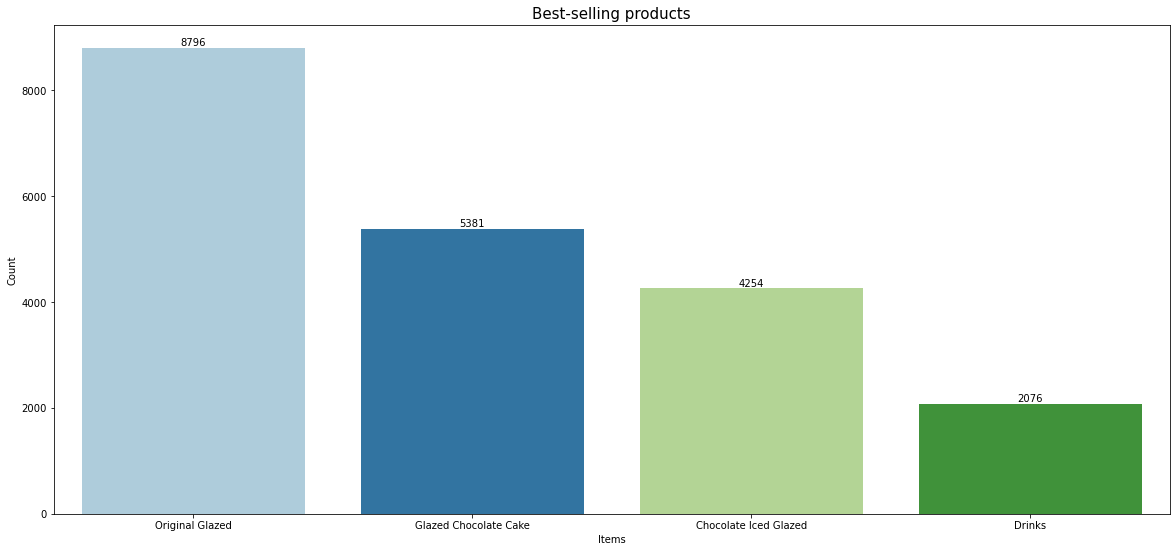

In [ ]:
products=df2["Items"].value_counts().reset_index(name="Count")
products=products.rename(columns={"index":"Items"})
plt.figure(figsize=(20,9))
colors=sns.color_palette("Paired")
ax=sns.barplot(x="Items",y="Count",data=products,palette=colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.title("Best-selling products",size=15)

# Adding location

In [ ]:
# taken from number of Google Reviews at the branch in ["Jurong", "Vivo"] respectively
googleReviews = [77, 61]
googleReviews[:] = [x / sum(googleReviews) for x in googleReviews] #scale the range to probability

In [ ]:
googleReviews

[0.5579710144927537, 0.4420289855072464]

In [ ]:
df2.shape

(20507, 5)

In [ ]:
location_distribution = np.random.choice(["Jurong", "Vivo"], size=20507, p=googleReviews)

In [ ]:
location_distribution = pd.Series(location_distribution)

In [ ]:
df2['Location'] = location_distribution

In [ ]:
df2

,TransactionNo,Items,DateTime,Daypart,DayType,Location
0,1,Original Glazed,2016-10-30 09:58:11,Morning,Weekend,Jurong
1,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend,Jurong
2,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend,Vivo
3,3,Drinks,2016-10-30 10:07:57,Morning,Weekend,Jurong
4,3,Chocolate Iced Glazed,2016-10-30 10:07:57,Morning,Weekend,Vivo
...,...,...,...,...,...,...
20502,9682,Original Glazed,2017-09-04 14:32:58,Afternoon,Weekend,Jurong
20503,9682,Glazed Chocolate Cake,2017-09-04 14:32:58,Afternoon,Weekend,Jurong
20504,9683,Original Glazed,2017-09-04 14:57:06,Afternoon,Weekend,Jurong
20505,9683,Glazed Chocolate Cake,2017-09-04 14:57:06,Afternoon,Weekend,Jurong


In [ ]:
dataLocation=df2.groupby("Location")["TransactionNo"].count().reset_index()
dataLocation

,Location,TransactionNo
0,Jurong,11457
1,Vivo,9050


### With the DateTime column, divide by month, week, and hour

In [ ]:
df2["Date"]=pd.to_datetime(df["DateTime"]).dt.date
df2["Year"]=pd.to_datetime(df["DateTime"]).dt.year
df2["Month_Number"]=pd.to_datetime(df["DateTime"]).dt.month
df2["Day_Number"]=pd.to_datetime(df["DateTime"]).dt.weekday
df2["Hour"]=pd.to_datetime(df["DateTime"]).dt.hour

In [ ]:
df2.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Location,Date,Year,Month,Day,Hour,Month_Number,Day_Number
0,1,Original Glazed,2016-10-30 09:58:11,Morning,Weekend,Jurong,2016-10-30,2016,10,6,9,10,6
1,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend,Jurong,2016-10-30,2016,10,6,10,10,6
2,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Morning,Weekend,Vivo,2016-10-30,2016,10,6,10,10,6
3,3,Drinks,2016-10-30 10:07:57,Morning,Weekend,Jurong,2016-10-30,2016,10,6,10,10,6
4,3,Chocolate Iced Glazed,2016-10-30 10:07:57,Morning,Weekend,Vivo,2016-10-30,2016,10,6,10,10,6


In [ ]:
df2['Hour'].value_counts().sort_index()

1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: Hour, dtype: int64

In [ ]:
df3 = df2.copy()

### Adding another column for month name
df3["Month"]=df3["Month_Number"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))

### Adding another column for day name
df3["Day"]=df3["Day_Number"].replace((0,1,2,3,4,5,6),('Monday','Tuesday' ,'Wednesday' ,'Thursday','Friday' ,'Saturday' ,'Sunday'))

### Changing hours
replacements = {
    7: "Morning", 
    8: "Morning", 
    9: "Morning", 
    10: "Morning", 

    11: "Afternoon", 
    12: "Afternoon",
    13: "Afternoon",
    14: "Afternoon",
    15: "Afternoon",
}
df3['Hour'] = df3['Hour'].map(replacements).fillna('Evening')

In [ ]:
df3['Hour'].value_counts()

Afternoon    13328
Morning       5301
Evening       1878
Name: Hour, dtype: int64

In [ ]:
df3.tail()

,TransactionNo,Items,DateTime,Daypart,DayType,Location,Date,Year,Month,Day,Hour,Month_Number,Day_Number
20502,9682,Original Glazed,2017-09-04 14:32:58,Afternoon,Weekend,Jurong,2017-09-04,2017,September,Monday,Afternoon,9,0
20503,9682,Glazed Chocolate Cake,2017-09-04 14:32:58,Afternoon,Weekend,Jurong,2017-09-04,2017,September,Monday,Afternoon,9,0
20504,9683,Original Glazed,2017-09-04 14:57:06,Afternoon,Weekend,Jurong,2017-09-04,2017,September,Monday,Afternoon,9,0
20505,9683,Glazed Chocolate Cake,2017-09-04 14:57:06,Afternoon,Weekend,Jurong,2017-09-04,2017,September,Monday,Afternoon,9,0
20506,9684,Drinks,2017-09-04 15:04:24,Afternoon,Weekend,Jurong,2017-09-04,2017,September,Monday,Afternoon,9,0


In [ ]:
# df.columns = ['TransactionNo',	'Items',	'DateTime',	'Daypart',	'DayType',	'Location',	'Year',	'Month',	'Day',	'Hour']

In [ ]:
df3.drop('Daypart', axis=1, inplace=True)

In [ ]:
df3.head()

,TransactionNo,Items,DateTime,DayType,Location,Date,Year,Month,Day,Hour,Month_Number,Day_Number
0,1,Original Glazed,2016-10-30 09:58:11,Weekend,Jurong,2016-10-30,2016,October,Sunday,Morning,10,6
1,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Weekend,Jurong,2016-10-30,2016,October,Sunday,Morning,10,6
2,2,Glazed Chocolate Cake,2016-10-30 10:05:34,Weekend,Vivo,2016-10-30,2016,October,Sunday,Morning,10,6
3,3,Drinks,2016-10-30 10:07:57,Weekend,Jurong,2016-10-30,2016,October,Sunday,Morning,10,6
4,3,Chocolate Iced Glazed,2016-10-30 10:07:57,Weekend,Vivo,2016-10-30,2016,October,Sunday,Morning,10,6


In [ ]:
# from google.colab import files
df3.to_csv('crispKreme.csv', index=False, encoding='utf-8-sig')
# files.download('crispKreme.csv')